<a href="https://colab.research.google.com/github/Anniemuthoni6/Introduction-To-Git-Hub/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
# Load specific sheets from an Excel file
file_path = 'Consumption_headline_EW_2022.xlsx'
sheet_names = ['Table_4',  'Table_8', 'Table_16']  # Specify the sheets to load

# Read each specified sheet, skipping the first 6 rows and using the 7th row as header
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet, header=6) for sheet in sheet_names}

In [23]:
# Display the first few rows of each DataFrame to inspect the raw data
for sheet, df in dataframes.items():
    print(f"Raw DataFrame for {sheet}:")
    print(df.head(10))  # Display the first 10 rows of the DataFrame
    print("\n")

Raw DataFrame for Table_4:
   Year       1        2        3       4  5 or more    Unknown  \
0  2005  278770   821760  1448730  350750      80820      15650   
1  2006  315710   935830  1636560  394470      89730      17340   
2  2007  317910   940570  1634110  395740      89910      17300   
3  2008  320440   945140  1633770  396530      90150      17350   
4  2009  322050   951340  1644630  399530      90820      17430   
5  2010  325490   960850  1659470  402860      91730      17630   
6  2011  345500   983530  1690800  413990      94950  [no data]   
7  2012  341160   974170  1677650  411190      93990  [no data]   
8  2013  388110  1117960  1937890  455950      98250  [no data]   
9  2014  342800  1067210  1900310  441050      94810  [no data]   

   All dwellings  Unnamed: 8  Year.1  ...  All dwellings.1  Unnamed: 17  \
0        2996480         NaN    2005  ...             4600          NaN   
1        3389650         NaN    2006  ...             4500          NaN   
2        3

In [24]:
# Function to extract up to three tables from a DataFrame
def extract_tables(df):
    # Identify the columns that are not completely empty
    non_empty_columns = df.columns[df.notna().any()].tolist()

    # Initialize a list to hold the extracted tables
    tables = []

    # Iterate through the non-empty columns to find tables
    start_col = 0
    for col in non_empty_columns:
        # Check if the current column is empty
        if pd.isna(df[col]).all():
            continue  # Skip empty columns

        # Find the end of the current table (next empty column)
        end_col = start_col
        while end_col < len(df.columns) and not pd.isna(df.iloc[:, end_col]).all():
            end_col += 1

        # Extract the current table
        table = df.iloc[:, start_col:end_col]
        tables.append(table)

        # Stop extraction after the third table
        if len(tables) >= 3:
            break

        # Move to the next column after the empty one
        start_col = end_col + 1

    return tables

# Extract tables from each DataFrame
extracted_tables = {}
for sheet, df in dataframes.items():
    tables = extract_tables(df)
    extracted_tables[sheet] = tables  # Store extracted tables in a dictionary

In [25]:
# Function to construct new table names
def construct_table_name(sheet, index):
    return f"Table_{sheet.split('_')[-1]}{chr(96 + index)}"  # e.g., Table_16, Table_16a, etc.

In [26]:
# Display and rename the extracted tables
for sheet, tables in extracted_tables.items():
    # Highlight the main table heading
    if  sheet == "Table_4":
        print(f"{sheet}: Electricity consumption by number of bedrooms")

    elif sheet == "Table_8":
        print(f"{sheet}: Electricity consumption by property age")

    elif sheet == "Table_16":
        print(f"{sheet}: Electricity consumption by country and region")

    # Print a newline for better readability
    print()

    # Now display the sub-tables
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Construct the new table name using the function
        new_table_name = construct_table_name(sheet, i + 1)  # i + 1 for 1-based index

        # Print the sub-table name with context
        if sheet == "Table_4":
          if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 4a
          elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 4b
          elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 4c

        elif sheet == "Table_8":
          if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 8a
          elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 8b
          elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 8c



        elif sheet == "Table_16":
            if i == 0:
                print(f"{new_table_name}: Number of dwellings in sample by number of bedrooms")  # Table 16a
            elif i == 1:
                print(f"{new_table_name}: Mean electricity consumption (kWh) by number of bedrooms")  # Table 16b
            elif i == 2:
                print(f"{new_table_name}: Median electricity consumption (kWh) by number of bedrooms")  # Table 16c

        # Print the entire table for verification
        print(table)  # Display the entire table
        print("\n")  # Print a newline for better readability

Table_4: Electricity consumption by number of bedrooms

Table_4a: Number of dwellings in sample by number of bedrooms
    Year        1        2         3        4  5 or more    Unknown  \
0   2005   278770   821760   1448730   350750      80820      15650   
1   2006   315710   935830   1636560   394470      89730      17340   
2   2007   317910   940570   1634110   395740      89910      17300   
3   2008   320440   945140   1633770   396530      90150      17350   
4   2009   322050   951340   1644630   399530      90820      17430   
5   2010   325490   960850   1659470   402860      91730      17630   
6   2011   345500   983530   1690800   413990      94950  [no data]   
7   2012   341160   974170   1677650   411190      93990  [no data]   
8   2013   388110  1117960   1937890   455950      98250  [no data]   
9   2014   342800  1067210   1900310   441050      94810  [no data]   
10  2015   331290  1026480   1832970   439270      94360  [no data]   
11  2016   365130  1111270   1

In [27]:
# Assess data quality for each extracted table
def assess_data_quality(extracted_tables):
    for sheet, tables in extracted_tables.items():
        for i, table in enumerate(tables, start=1):
            # Construct the new table name using the function
            new_table_name = construct_table_name(sheet, i)
            print(f"Data Quality Assessment for {new_table_name}:")  # Print the current table name

            # Display information about the DataFrame (data types, non-null counts)
            print("\nDataFrame Info:")
            print(table.info())

            # Show summary statistics for numerical columns
            print("\nSummary Statistics:")
            print(table.describe())

            # Check for missing values in each column
            print("\nMissing Values Count:")
            print(table.isnull().sum())

            # Additional checks (e.g., unique values in categorical columns)
            print("\nUnique Values Count:")
            for col in table.select_dtypes(include=['object']).columns:
                print(f"{col}: {table[col].nunique()} unique values")

            # Additional data quality checks (e.g., data types)
            print("\nData Types:")
            print(table.dtypes)

            print("\n" + "="*50 + "\n")  # Separator for better readability

# Call the function to assess data quality
assess_data_quality(extracted_tables)

Data Quality Assessment for Table_4a:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           18 non-null     int64 
 1   1              18 non-null     int64 
 2   2              18 non-null     int64 
 3   3              18 non-null     int64 
 4   4              18 non-null     int64 
 5   5 or more      18 non-null     int64 
 6   Unknown        18 non-null     object
 7   All dwellings  18 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ KB
None

Summary Statistics:
              Year             1             2             3             4  \
count    18.000000  1.800000e+01  1.800000e+01  1.800000e+01  1.800000e+01   
mean   2013.500000  9.918622e+05  2.780046e+06  4.630639e+06  1.239057e+06   
std       5.338539  9.597302e+05  2.611765e+06  4.240914e+06  1.199770e+06   
min    2005.000000  2.787

In [28]:
# Handle missing values after data quality assessment
for sheet, tables in extracted_tables.items():
    for i, table in enumerate(tables, start=1):
        # Replace '[no data]' with 0
        table.replace('[no data]', 0, inplace=True)

        # Construct the new table name for display using the construct_table_name function
        new_table_name = construct_table_name(sheet, i)  # e.g., Table_16, Table_16a, etc.

        # Print the updated data quality assessment after handling missing values
        print(f"Updated Data  for {new_table_name} after handling missing values:")
        print(table.head(10))  # Display the first 10 rows of the updated table
        print("\n" + "="*50 + "\n")  # Print a separator for better readability
# Remove Outliers
# Define the columns for which you want to remove outliers
columns_to_check = ['All dwellings.1', '1.1', '2.1', '3.1', '4.1', '5 or more.1',
                    'Pre 1919.1', '1919 to 1944.1', '1945 to 1964.1',
                    '1965 to 1982.1', '1983 to 1992.1',
                    'North East.1', 'North West.1', 'Yorks & Humber.1',
                    'East Midlands.1', 'West Midlands.1',
                    'East of England.1', 'London.1',
                    'South East.1', 'South West.1', 'Wales.1']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers from the merged_data DataFrame
cleaned_data = remove_outliers_iqr(merged_data, columns_to_check)

# Display the shape of the original and cleaned DataFrames
print(f'Original Data Shape: {merged_data.shape}')
print(f'Cleaned Data Shape: {cleaned_data.shape}')

Updated Data  for Table_4a after handling missing values:
   Year       1        2        3       4  5 or more  Unknown  All dwellings
0  2005  278770   821760  1448730  350750      80820    15650        2996480
1  2006  315710   935830  1636560  394470      89730    17340        3389650
2  2007  317910   940570  1634110  395740      89910    17300        3395530
3  2008  320440   945140  1633770  396530      90150    17350        3403390
4  2009  322050   951340  1644630  399530      90820    17430        3425800
5  2010  325490   960850  1659470  402860      91730    17630        3458030
6  2011  345500   983530  1690800  413990      94950        0        3528760
7  2012  341160   974170  1677650  411190      93990        0        3498160
8  2013  388110  1117960  1937890  455950      98250        0        3998160
9  2014  342800  1067210  1900310  441050      94810        0        3846180


Updated Data  for Table_4b after handling missing values:
   Year.1   1.1   2.1   3.1   4.1  

In [29]:
# Perform data reduction to include only years from 2011 to 2022
for sheet, tables in extracted_tables.items():
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Identify the year column (assuming it starts with 'Year')
        year_column = [col for col in table.columns if 'Year' in col]

        if year_column:  # Check if any year column is found
            # Filter the table to include only rows where the year is between 2011 and 2022
            filtered_table = table[(table[year_column[0]] >= 2011) & (table[year_column[0]] <= 2022)]

            # Construct the new table name for display
            new_table_name = f"Table_{sheet.split('_')[-1]}{chr(96 + (i + 1))}"  # e.g., Table_16a, Table_16b, etc.

            # Print the filtered table with context
            print(f"Data Reduction for {new_table_name} (Years 2011 to 2022):")
            print(filtered_table)  # Display the entire filtered table
            print("\n" + "="*50 + "\n")  # Print a separator for better readability
        else:
            print(f"No year column found in {sheet} - Table {i + 1}.")

Data Reduction for Table_4a (Years 2011 to 2022):
    Year        1        2         3        4  5 or more  Unknown  \
6   2011   345500   983530   1690800   413990      94950        0   
7   2012   341160   974170   1677650   411190      93990        0   
8   2013   388110  1117960   1937890   455950      98250        0   
9   2014   342800  1067210   1900310   441050      94810        0   
10  2015   331290  1026480   1832970   439270      94360        0   
11  2016   365130  1111270   1916570   484860     108930   124540   
12  2017  2240430  6234090  10330390  2778520     647000        0   
13  2018  2274900  6298130  10392720  2818350     654870        0   
14  2019  2276470  6295180  10366750  2834260     655500        0   
15  2020  2323710  6394210  10471920  2916270     680940        0   
16  2021  2348270  6467940  10580300  2952900     689680        0   
17  2022  2395380  6515170  10595970  3016530     706270        0   

    All dwellings  
6         3528760  
7         34

In [30]:
# Assuming extracted_tables is already defined and contains your data
output_directory = 'Filtered_Consumption_Data/'  # Specify the output directory
import os
# Create the output directory if it does not exist
os.makedirs(output_directory, exist_ok=True)

# Perform data reduction to include only years from 2011 to 2022
for sheet, tables in extracted_tables.items():
    for i in range(len(tables)):
        table = tables[i]  # Access each table by index

        # Identify the year column (assuming it starts with 'Year')
        year_column = [col for col in table.columns if 'Year' in col]

        if year_column:  # Check if any year column is found
            # Filter the table to include only rows where the year is between 2011 and 2022
            filtered_table = table[(table[year_column[0]] >= 2011) & (table[year_column[0]] <= 2022)]

            # Construct the new table name for saving
            new_table_name = f"Table_{sheet.split('_')[-1]}{chr(96 + (i + 1))}.csv"  # e.g., Table_16a.csv

            # Save the filtered table to a CSV file
            filtered_table.to_csv(f"{output_directory}{new_table_name}", index=False)

            # Print the filtered table with context
            print(f"Data Reduction for {new_table_name} (Years 2011 to 2022):")
            print(filtered_table)  # Display the entire filtered table
            print("\n" + "="*50 + "\n")  # Print a separator for better readability
        else:
            print(f"No year column found in {sheet} - Table {i + 1}.")

Data Reduction for Table_4a.csv (Years 2011 to 2022):
    Year        1        2         3        4  5 or more  Unknown  \
6   2011   345500   983530   1690800   413990      94950        0   
7   2012   341160   974170   1677650   411190      93990        0   
8   2013   388110  1117960   1937890   455950      98250        0   
9   2014   342800  1067210   1900310   441050      94810        0   
10  2015   331290  1026480   1832970   439270      94360        0   
11  2016   365130  1111270   1916570   484860     108930   124540   
12  2017  2240430  6234090  10330390  2778520     647000        0   
13  2018  2274900  6298130  10392720  2818350     654870        0   
14  2019  2276470  6295180  10366750  2834260     655500        0   
15  2020  2323710  6394210  10471920  2916270     680940        0   
16  2021  2348270  6467940  10580300  2952900     689680        0   
17  2022  2395380  6515170  10595970  3016530     706270        0   

    All dwellings  
6         3528760  
7       

In [58]:
# Load the cleaned CSV files for each relevant table
table_4a = pd.read_csv('Filtered_Consumption_Data/Table_4a.csv')  # Mean electricity consumption by number of bedrooms
table_4b = pd.read_csv('Filtered_Consumption_Data/Table_4b.csv')  # Mean electricity consumption by number of bedrooms
table_4c = pd.read_csv('Filtered_Consumption_Data/Table_4c.csv')  # Mean electricity consumption by number of bedrooms
table_8a = pd.read_csv('Filtered_Consumption_Data/Table_8a.csv')  # Mean electricity consumption by property age
table_8b = pd.read_csv('Filtered_Consumption_Data/Table_8b.csv')  # Mean electricity consumption by property age
table_8c = pd.read_csv('Filtered_Consumption_Data/Table_8c.csv')  # Mean electricity consumption by property age
table_16a = pd.read_csv('Filtered_Consumption_Data/Table_16a.csv')  # Mean electricity consumption by region
table_16b = pd.read_csv('Filtered_Consumption_Data/Table_16b.csv')  # Mean electricity consumption by region
table_16c = pd.read_csv('Filtered_Consumption_Data/Table_16c.csv')  # Mean electricity consumption by region


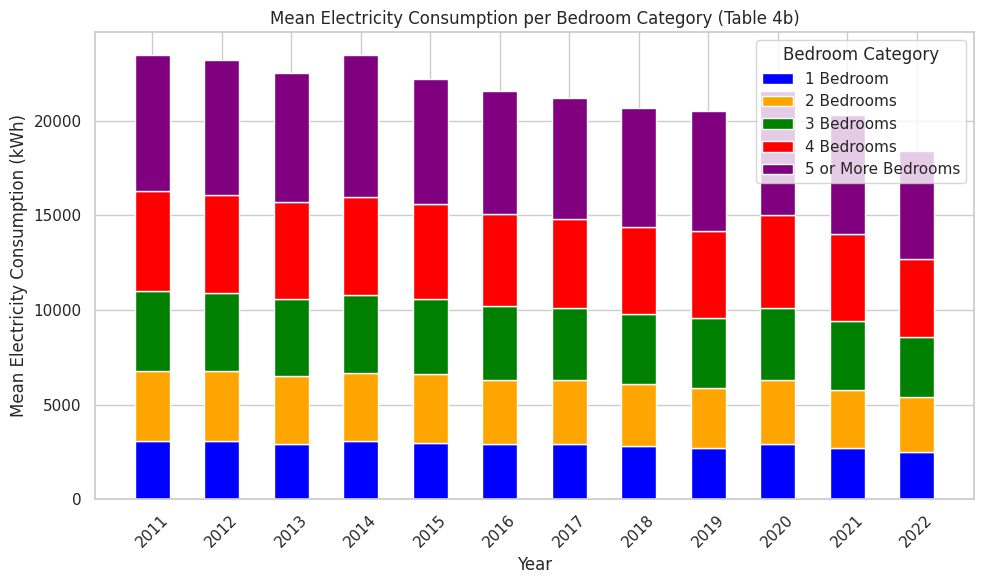

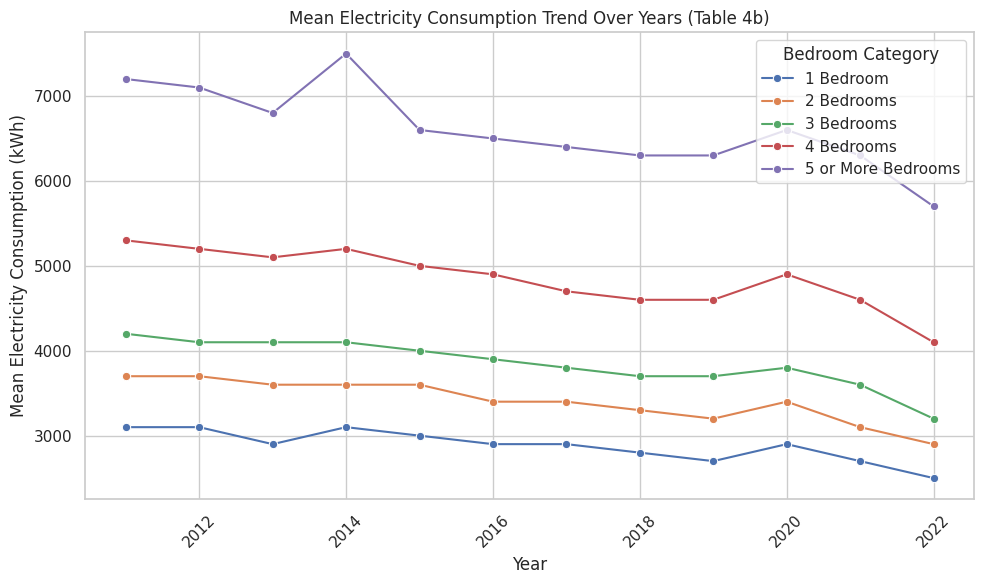

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

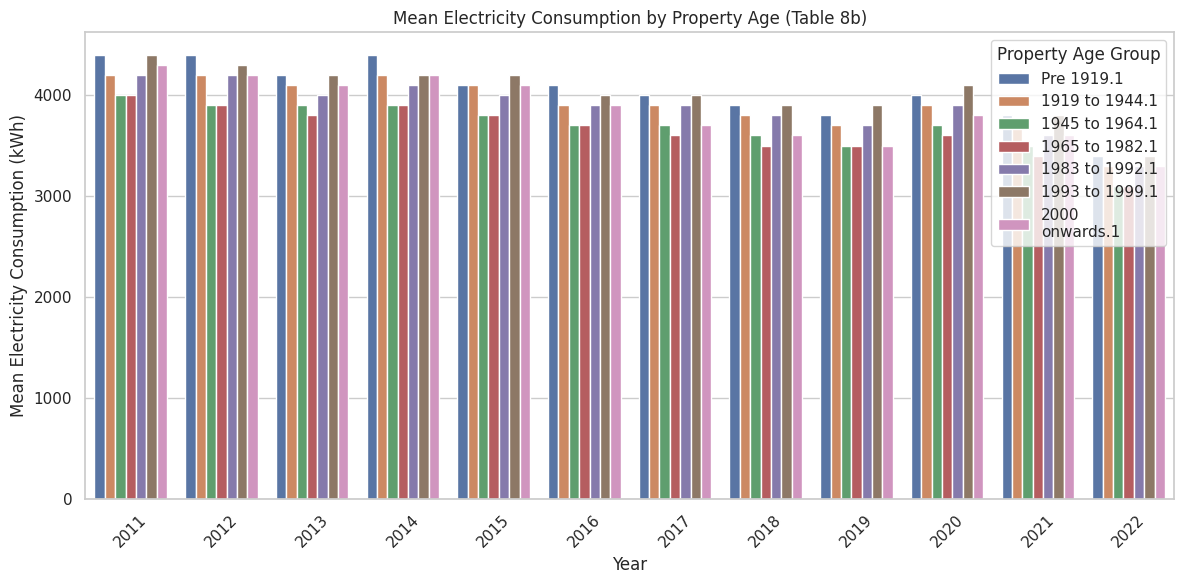

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

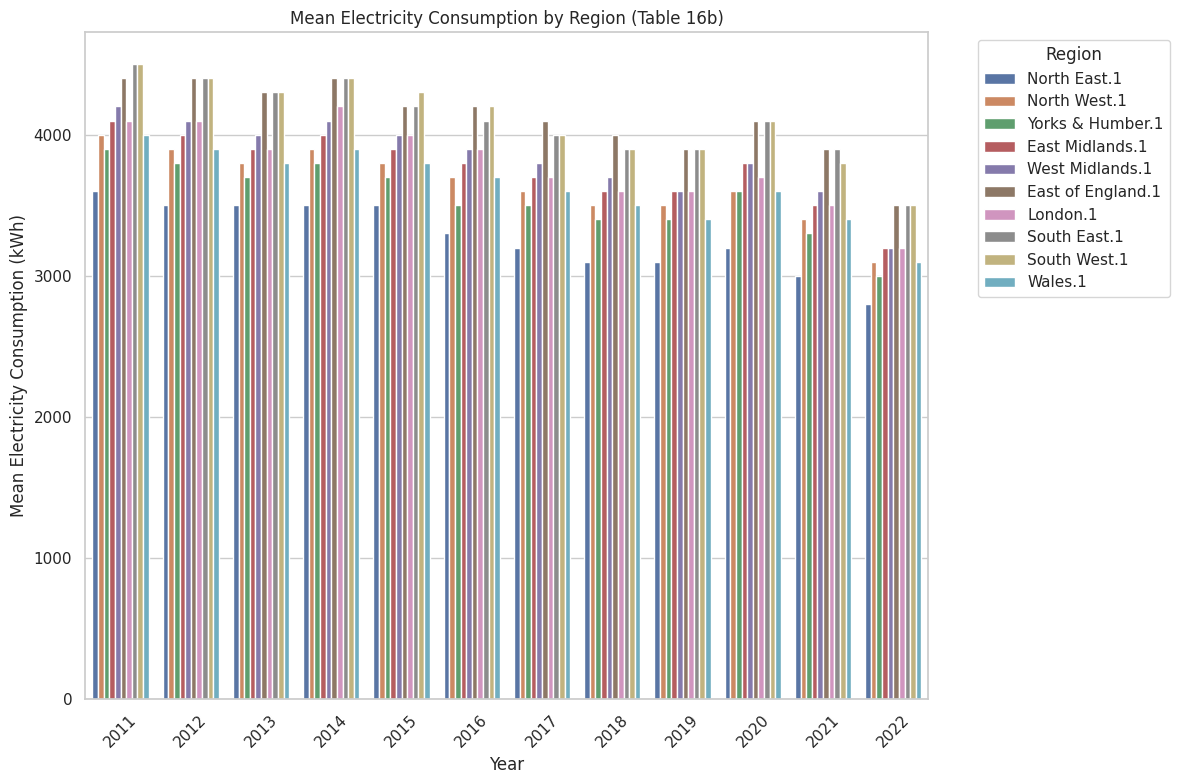

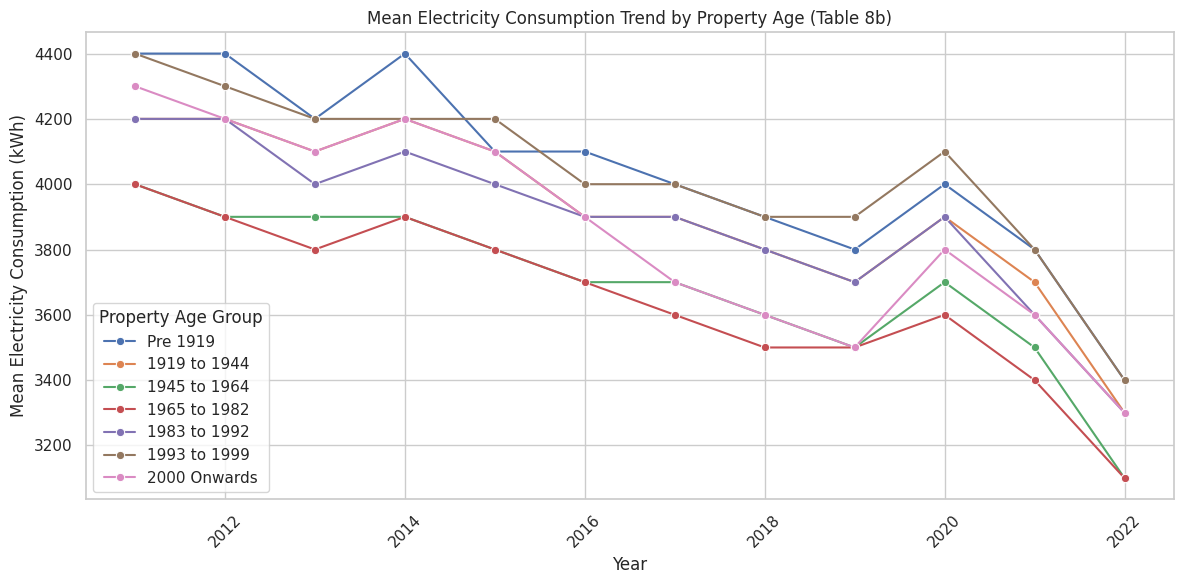

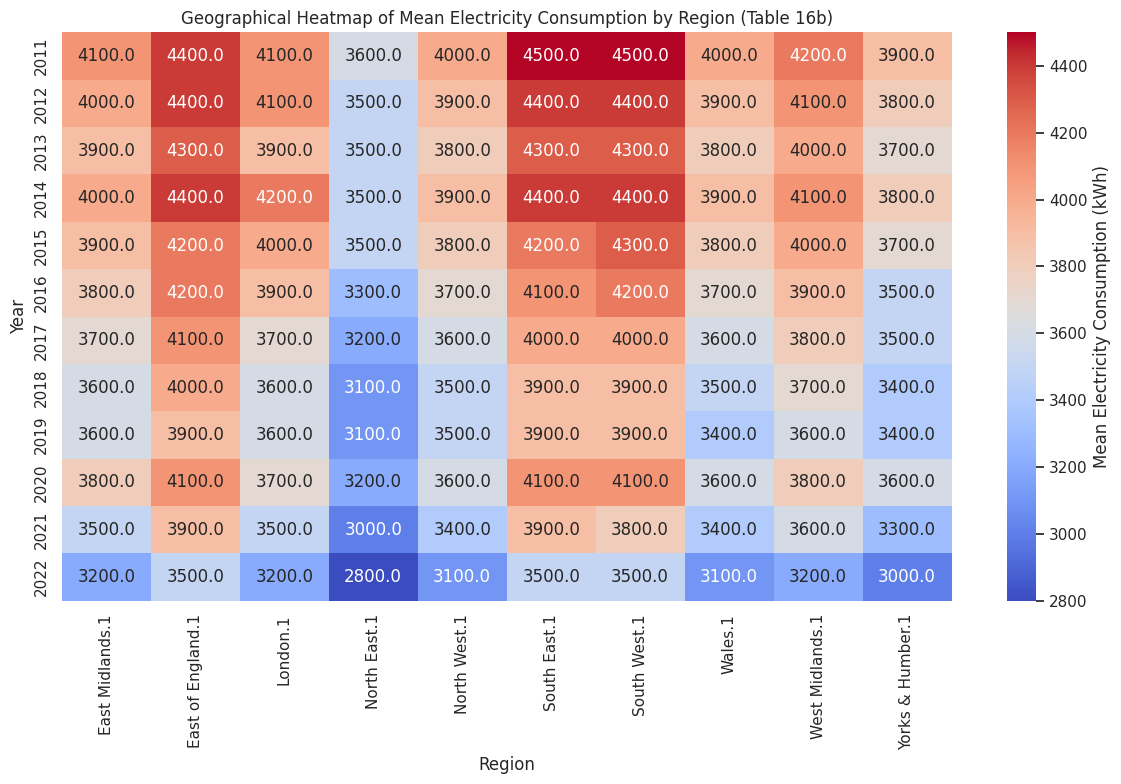

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")


# Visualizations

import numpy as np

# 1. Stacked Bar graph showing mean electricity consumption per bedroom category using Table 4b
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
bar_width = 0.5
x = np.arange(len(table_4b['Year.1']))

# Create the bars for each bedroom category
plt.bar(x, table_4b['1.1'], width=bar_width, label='1 Bedroom', color='blue')
plt.bar(x, table_4b['2.1'], width=bar_width, bottom=table_4b['1.1'], label='2 Bedrooms', color='orange')
plt.bar(x, table_4b['3.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'], label='3 Bedrooms', color='green')
plt.bar(x, table_4b['4.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'] + table_4b['3.1'], label='4 Bedrooms', color='red')
plt.bar(x, table_4b['5 or more.1'], width=bar_width, bottom=table_4b['1.1'] + table_4b['2.1'] + table_4b['3.1'] + table_4b['4.1'], label='5 or More Bedrooms', color='purple')

# Set the title and labels
plt.title('Mean Electricity Consumption per Bedroom Category (Table 4b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.xticks(x, table_4b['Year.1'], rotation=45)
plt.legend(title='Bedroom Category')
plt.tight_layout()
plt.show()

# 2. Line graph showing mean electricity consumption trend over years using Table 4b
plt.figure(figsize=(10, 6))
sns.lineplot(data=table_4b, x='Year.1', y='1.1', marker='o', label='1 Bedroom')
sns.lineplot(data=table_4b, x='Year.1', y='2.1', marker='o', label='2 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='3.1', marker='o', label='3 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='4.1', marker='o', label='4 Bedrooms')
sns.lineplot(data=table_4b, x='Year.1', y='5 or more.1', marker='o', label='5 or More Bedrooms')
plt.title('Mean Electricity Consumption Trend Over Years (Table 4b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Bedroom Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Create a grouped bar graph for Mean Electricity Consumption by Property Age (Table 8b)
# Melting the DataFrame to long format for easier plotting
melted_data = table_8b.melt(id_vars=['Year.1'],
                              value_vars=['Pre 1919.1', '1919 to 1944.1', '1945 to 1964.1',
                                          '1965 to 1982.1', '1983 to 1992.1',
                                          '1993 to 1999.1', '2000\nonwards.1'],
                              var_name='Property Age', value_name='Mean Electricity Consumption (kWh)')


plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Year.1', y='Mean Electricity Consumption (kWh)', hue='Property Age')

# Set the title and labels
plt.title('Mean Electricity Consumption by Property Age (Table 8b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Property Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Bar graph comparing mean electricity consumption across different regions using Table 16b
# Melt the DataFrame to long format for easier plotting
melted_data = table_16b.melt(id_vars=['Year.1'],
                               value_vars=['North East.1', 'North West.1', 'Yorks & Humber.1',
                                           'East Midlands.1', 'West Midlands.1',
                                           'East of England.1', 'London.1',
                                           'South East.1', 'South West.1', 'Wales.1'],
                               var_name='Region', value_name='Mean Electricity Consumption (kWh)')

# Create a grouped bar graph
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data, x='Year.1', y='Mean Electricity Consumption (kWh)', hue='Region')

# Set the title and labels
plt.title('Mean Electricity Consumption by Region (Table 16b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Line graph showing mean electricity consumption trend for each property age category using Table 8b
plt.figure(figsize=(12, 6))

# Plotting each property age group's mean electricity consumption trend
sns.lineplot(data=table_8b, x='Year.1', y='Pre 1919.1', marker='o', label='Pre 1919')
sns.lineplot(data=table_8b, x='Year.1', y='1919 to 1944.1', marker='o', label='1919 to 1944')
sns.lineplot(data=table_8b, x='Year.1', y='1945 to 1964.1', marker='o', label='1945 to 1964')
sns.lineplot(data=table_8b, x='Year.1', y='1965 to 1982.1', marker='o', label='1965 to 1982')
sns.lineplot(data=table_8b, x='Year.1', y='1983 to 1992.1', marker='o', label='1983 to 1992')
sns.lineplot(data=table_8b, x='Year.1', y='1993 to 1999.1', marker='o', label='1993 to 1999')
sns.lineplot(data=table_8b, x='Year.1', y='2000\nonwards.1', marker='o', label='2000 Onwards')
plt.title('Mean Electricity Consumption Trend by Property Age (Table 8b)')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumption (kWh)')
plt.legend(title='Property Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Geographical heatmap showing mean electricity consumption by region using Table 16b
# Reshape the DataFrame using melt
melted_data = table_16b.melt(id_vars=['Year.1'],
                               value_vars=['North East.1', 'North West.1', 'Yorks & Humber.1',
                                           'East Midlands.1', 'West Midlands.1',
                                           'East of England.1', 'London.1',
                                           'South East.1', 'South West.1', 'Wales.1'],
                               var_name='Region', value_name='Mean Electricity Consumption (kWh)')

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap_data = melted_data.pivot(index="Year.1", columns="Region", values="Mean Electricity Consumption (kWh)")
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Mean Electricity Consumption (kWh)'})

# Set the title and labels
plt.title('Geographical Heatmap of Mean Electricity Consumption by Region (Table 16b)')
plt.xlabel('Region')
plt.ylabel('Year')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


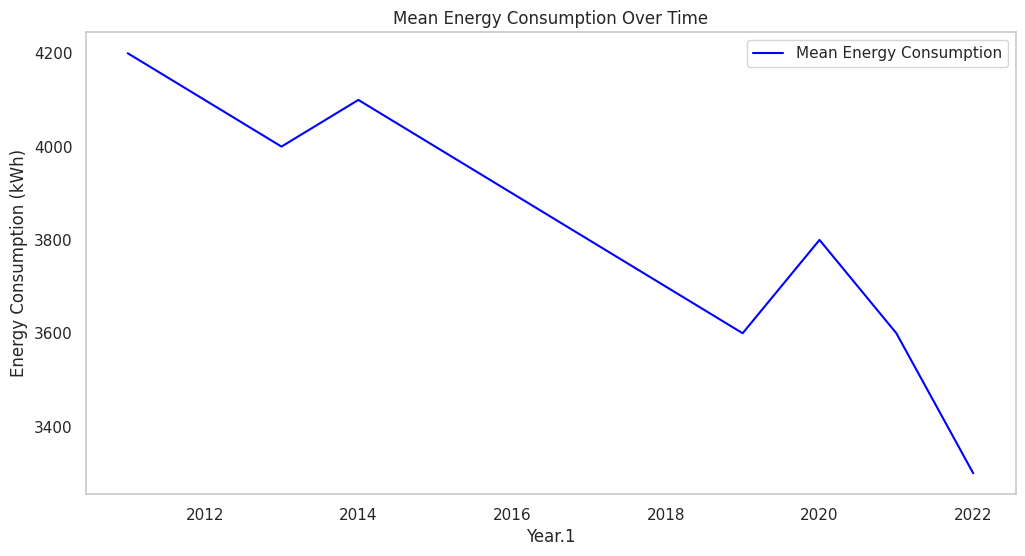

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -68.862
Date:                Sun, 05 Jan 2025   AIC                            141.723
Time:                        22:13:18   BIC                            142.519
Sample:                             0   HQIC                           141.222
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -81.8182     43.077     -1.899      0.058    -166.247       2.611
sigma2      1.603e+04   6916.178      2.318      0.020    2477.597    2.96e+04
Ljung-Box (L1) (Q):                   0.14   Jarque-

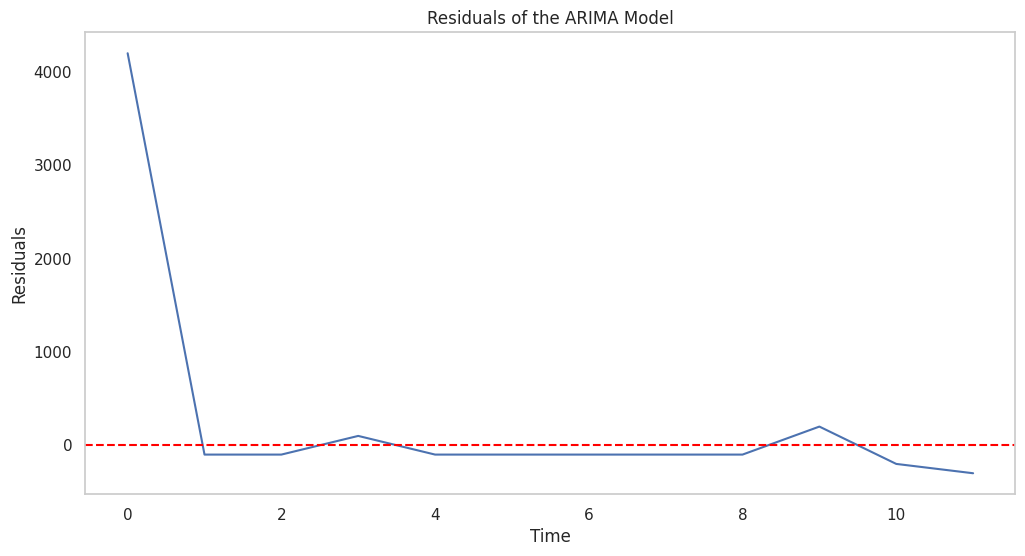

<Figure size 1200x600 with 0 Axes>

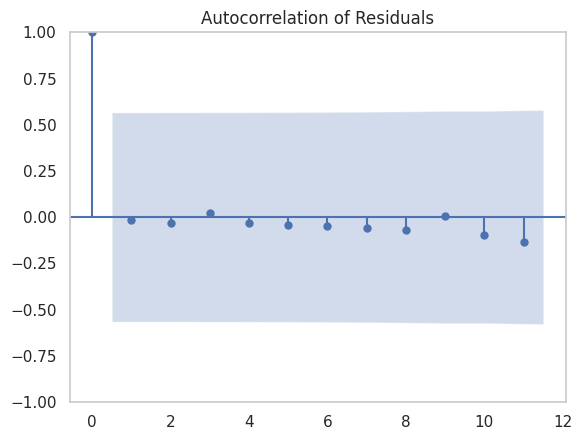

Mean Squared Error: 43333.333333333336


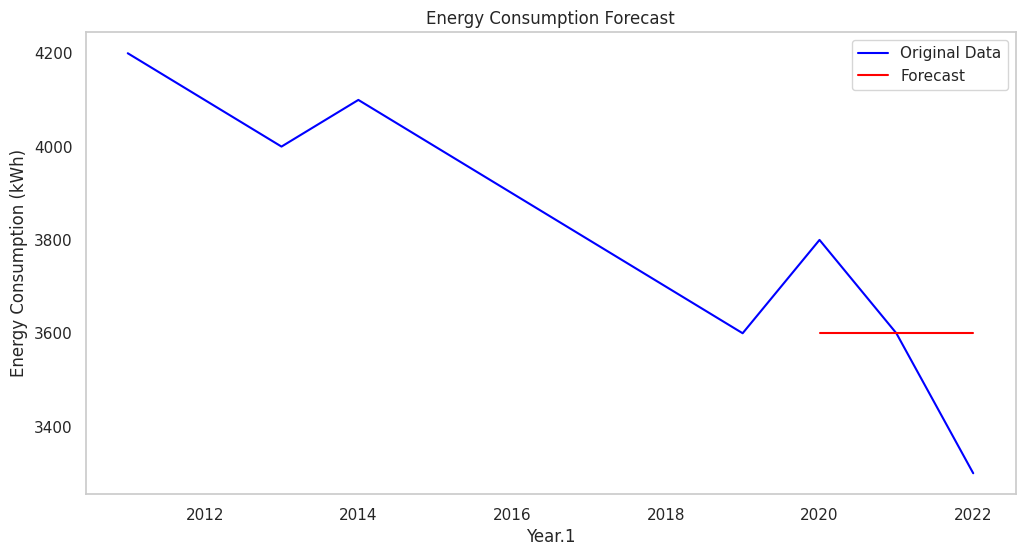

In [54]:
#Analysis of  how energy consumption changes over the years for different property age categories
try:
    import pmdarima
except ImportError:
    import pip
    pip.main(['install', 'pmdarima'])
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Data Preparation
# Group by year and calculate the mean energy consumption for different property ages
energy_trends = table_8b.groupby(['Year.1'])[['All dwellings.1']].mean().reset_index()

# Visualize the original time series data
plt.figure(figsize=(12, 6))
plt.plot(energy_trends['Year.1'], energy_trends['All dwellings.1'], label='Mean Energy Consumption', color='blue')
plt.title('Mean Energy Consumption Over Time')
plt.xlabel('Year.1')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()

# Fit Auto ARIMA model to find the best parameters
auto_model = auto_arima(energy_trends['All dwellings.1'], seasonal=False, stepwise=True)
print(auto_model.summary())

# Fit the ARIMA model with the selected order
model = sm.tsa.ARIMA(energy_trends['All dwellings.1'], order=auto_model.order).fit()
print(model.summary())

# Residual Analysis
# Plotting residuals
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()

# Check for autocorrelation in residuals
from statsmodels.graphics.tsaplots import plot_acf

# Use a number of lags that is less than or equal to the number of residuals
max_lags = min(20, len(residuals) - 1)  # Ensure we don't exceed the number of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=max_lags)
plt.title('Autocorrelation of Residuals')
plt.grid()
plt.show()

# Forecasting
# Split the data into training and testing sets
train_size = int(len(energy_trends) * 0.8)
train, test = energy_trends['All dwellings.1'][:train_size], energy_trends['All dwellings.1'][train_size:]

# Fit the model on the training set
model = sm.tsa.ARIMA(train, order=auto_model.order).fit()

# Forecast on the test set
forecast = model.forecast(steps=len(test))

# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

# Plotting the original data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(energy_trends['Year.1'], energy_trends['All dwellings.1'], label='Original Data', color='blue')
plt.plot(energy_trends['Year.1'][train_size:], forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast')
plt.xlabel('Year.1')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()
# Forecasting with the ARIMA model
forecast = model.forecast(steps=len(test))


DISCUSSION
Model Type: Both are simple random walk models (ARIMA(0,1,0)) that track changes in mean electricity consumption over time.
Data Size: The models use only 12 observations, which is quite limited for time series analysis.
Key Findings
The models suggest a possible slight decrease in mean electricity consumption over time.
Both models fit the data reasonably well, with no significant autocorrelation in residuals.
The residuals appear to be normally distributed and show consistent variance over time.
Limitations:
The simple model structure may not capture complex patterns in the data.
The small dataset limits the models' ability to identify long-term trends.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:        All dwellings.1   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     133.2
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           4.62e-06
Time:                        22:25:41   Log-Likelihood:                -54.967
No. Observations:                  12   AIC:                             121.9
Df Residuals:                       6   BIC:                             124.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          51.5591    171.574      0.301      

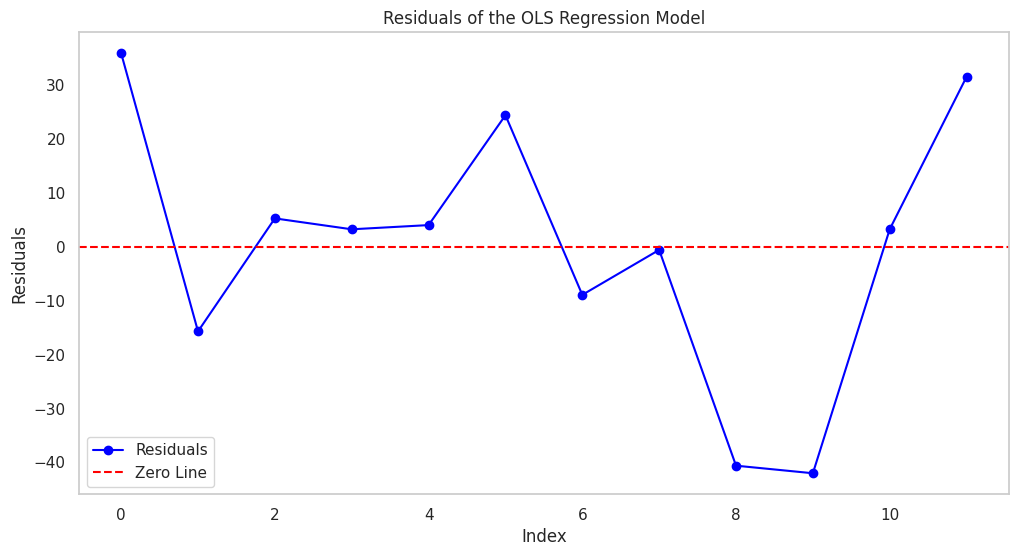

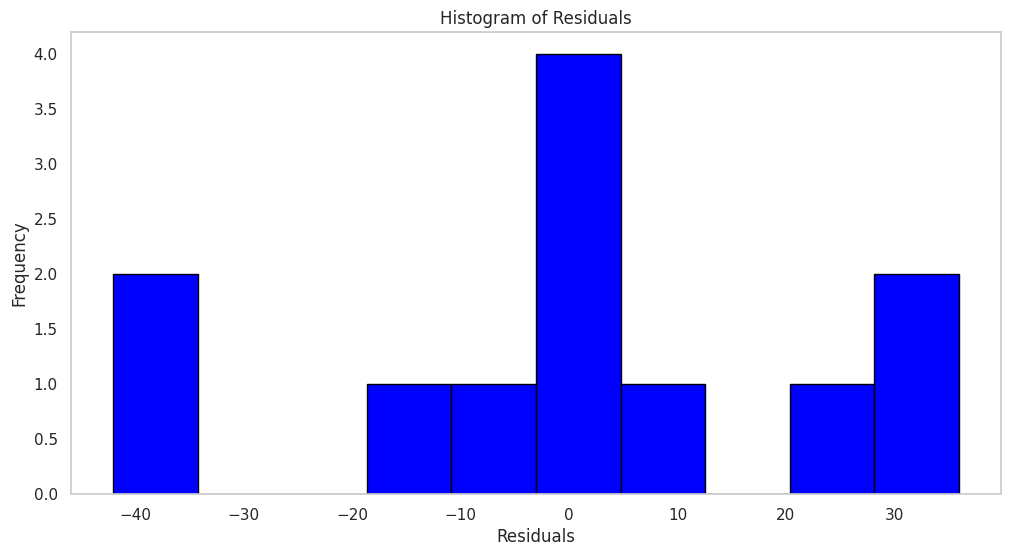

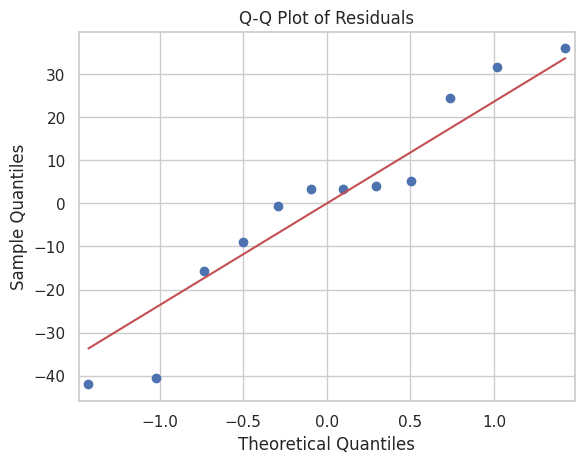

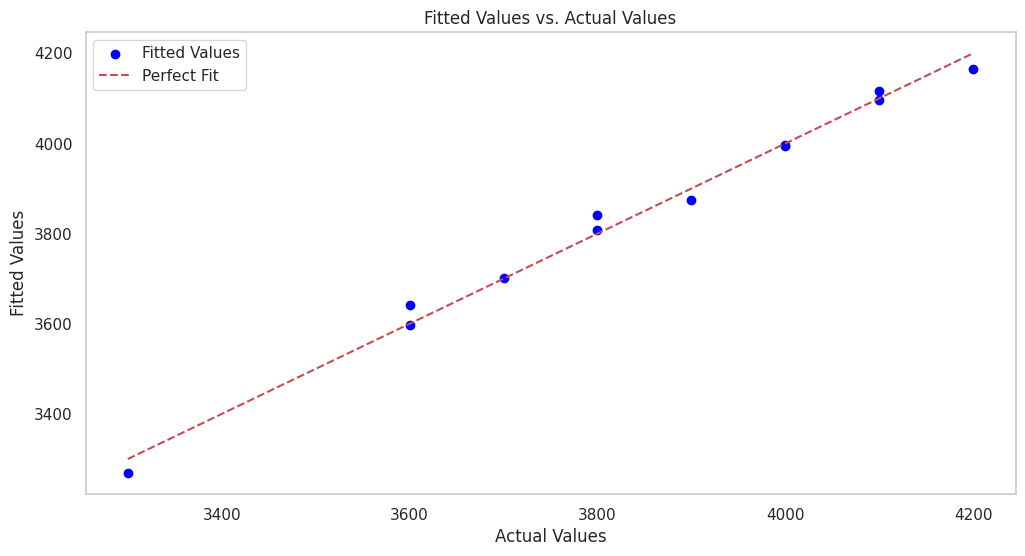

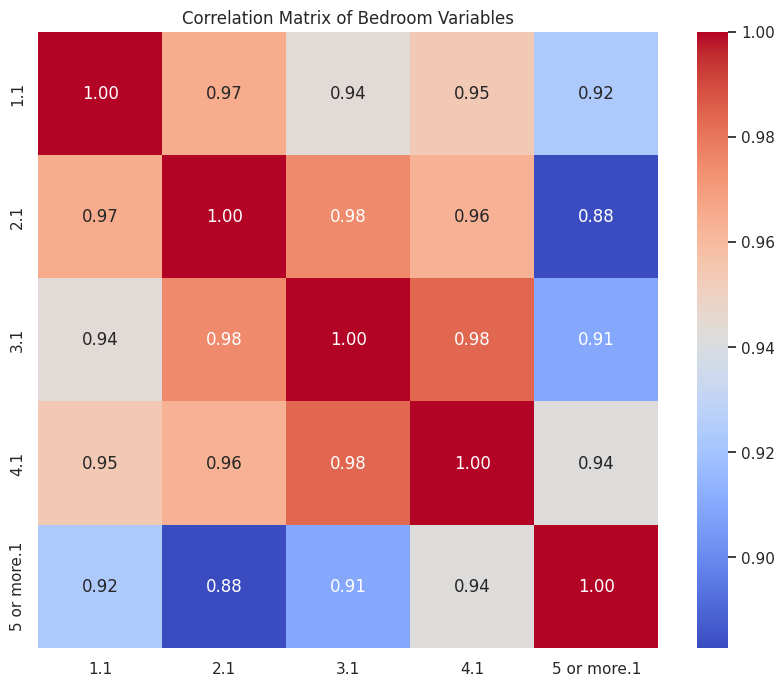

In [55]:
#Investigate How the Number of Bedrooms Affects Electricity Use
#Multiple Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the data
X = table_4b[['1.1', '2.1', '3.1', '4.1', '5 or more.1']]  # Number of bedrooms
y = table_4b['All dwellings.1']
X = sm.add_constant(X)  # Add constant for intercept

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Residual Analysis
residuals = model.resid

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, marker='o', linestyle='-', color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')  # Horizontal line at zero
plt.title('Residuals of the OLS Regression Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Fitted vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y, model.fittedvalues, color='blue', label='Fitted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')  # 45-degree line
plt.title('Fitted Values vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.legend()
plt.grid()
plt.show()

# Correlation Matrix
correlation_matrix = table_4b[['1.1', '2.1', '3.1', '4.1', '5 or more.1']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bedroom Variables')
plt.show()

DISCUSSION
Summary of OLS Regression Analysis on UK Household Electricity Consumption:
Model Fit:
R-squared: 0.991 (99.1% of variance explained)
Adjusted R-squared: 0.984
Overall model is statistically significant (F-statistic p-value: 4.62e-06)
Key Findings:
Strong overall relationship between number of bedrooms and electricity consumption
However, individual bedroom coefficients are not statistically significant
High multicollinearity detected (VIF values > 10 for all predictors)
Limitations:
Possible positive autocorrelation in residuals (Durbin-Watson: 1.370)
High multicollinearity may affect coefficient stability
Implications:
Number of bedrooms alone may not effectively predict electricity consumption
